# Data exploration basics with pandas

[*John Pinney*](https://github.com/johnpinney)

In this session, we will introduce you to some useful elements of the `pandas` package for working with and presenting tabular data.


### Import pandas (and matplotlib)

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

---
## 1. Getting started

### Load some data from a CSV file: `read_csv()`

[CSV (comma-separated values)](https://en.wikipedia.org/wiki/Comma-separated_values)  is a simple plain-text format for tabular data. It is easy to export CSV files from spreadsheets such as Excel, which can then be imported by many other software packages.

We will work with the file `happiness_2015.csv`, which contains data from the third World Happiness Report (see more details [here](https://www.openml.org/search?type=data&status=active&id=40916)).

The data is returned as a special object called a *[DataFrame](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe)*.

In [6]:
data = pd.read_csv('happiness_2015.csv')

### Look at the top of the table: `head()`

The *method* `head()` gives us the first *n* rows of the table.

In [7]:
data.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


We can see that the data points (or *instances*) are shown as rows in the table, while each *variable* in the data set corresponds to a named columns.

Variables may have different data types - this is one reason why we need special data handling tools like pandas rather than trying to do all operations with *numpy* arrays.

### Get the dimensions of the table: `shape`

The *attribute* [`shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) holds the dimensions of the DataFrame as (#rows, #columns) :

In [8]:
data.shape

(158, 12)

Pandas objects have many methods and attributes, which you can find listed in the [API reference](https://pandas.pydata.org/docs/reference/index.html). 

Remember that methods are like functions attached to an object (so can take arguments inside the parentheses), whilst attributes are like variables attached to the object (properties that can be examined).

### Check for missing data: `count()`
Are there any missing values in this data set? 

We can easily check how many non-missing (i.e. non-NA/null) values there are in each column of the DataFrame.

In [42]:
data.count()

Country                          158
Region                           158
Happiness Rank                   158
Happiness Score                  158
Standard Error                   158
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         158
Freedom                          158
Trust (Government Corruption)    158
Generosity                       158
Dystopia Residual                158
dtype: int64

---
## 2. Exploring the data

Let's make a bar chart for the number of countries in each region. Pandas plots are (by default) constructed using [matplotlib](https://matplotlib.org/stable/plot_types/index.html).

### Extract a single column: `[]`

Firstly, we will need to extract just the **Region** column. This is returned in the form of a pandas *[Series](https://pandas.pydata.org/docs/user_guide/dsintro.html#series)* object

In [23]:
data['Region']

0                       Western Europe
1                       Western Europe
2                       Western Europe
3                       Western Europe
4                        North America
                    ...               
153                 Sub-Saharan Africa
154                 Sub-Saharan Africa
155    Middle East and Northern Africa
156                 Sub-Saharan Africa
157                 Sub-Saharan Africa
Name: Region, Length: 158, dtype: object

### Find the unique values: `unique()`
As an aside, if we just need to know the full set of unique values used in a particular column, we can use the `unique()` method.

In [57]:
data['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [58]:
len(data['Region'].unique())

10

### Make a frequency table: `value_counts()`
Next, we need to count the frequency of each value observed in this Series - this is done with the method `value_counts()`.

In [24]:
data['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

### Make a bar chart: `plot.bar()`
Finally, a matplotlib bar chart can be made directly from pandas using the `plot.bar()` method.

### Rearrange the bars: `sort_index()`
By default, the frequency table is in descending frequency order. If we want to sort the groups alphabetically, there is a special method, `sort_index()`.

In [30]:
data['Region'].value_counts().sort_index()

Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
Name: Region, dtype: int64

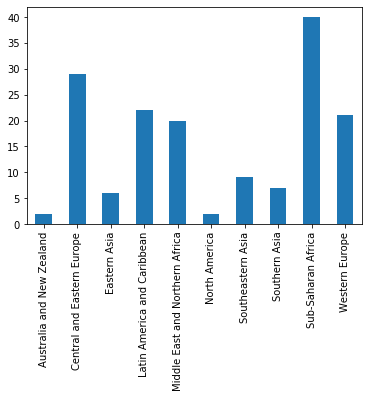

In [31]:
data['Region'].value_counts().sort_index().plot.bar()

We can suppress the matplotlib message by ading `plt.show()` as a final command.

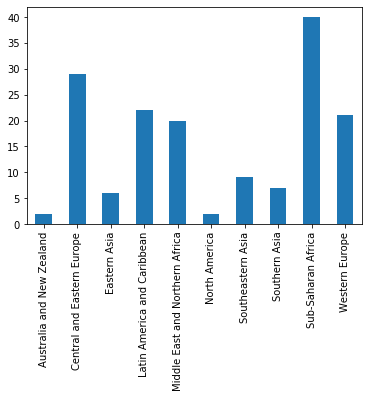

In [129]:
data['Region'].value_counts().sort_index().plot.bar()
plt.show()

### Change the appearance of the plot
Most of the pandas plotting functions accept matplotlib keyword arguments to control the appearance of the plot.

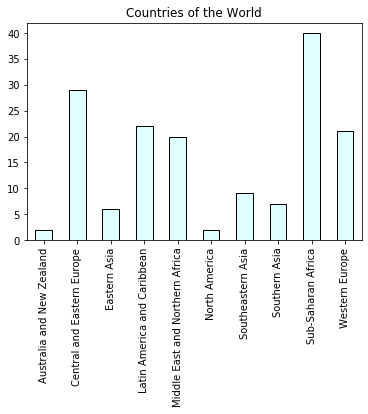

In [173]:
data['Region'].value_counts().sort_index().plot.bar(
    color='lightcyan',
    edgecolor='black',
    title='Countries of the World'
)
plt.show()

### Save the plot: `plt.savefig()`
To save the figure as a file, replace `plt.show()` with `plt.savefig()` and provide a filename. The image format is inferred from the file extension.

NB in jupyter, `plt.savefig()` must be in the same notebook cell as the code that makes the figure.

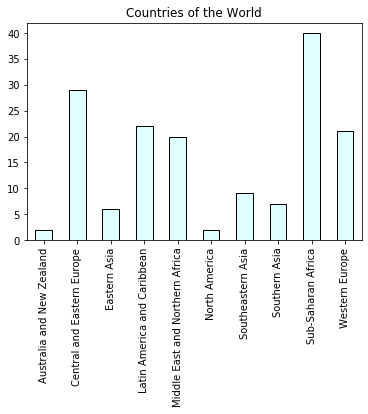

In [176]:
data['Region'].value_counts().sort_index().plot.bar(
    color='lightcyan',
    edgecolor='black',
    title='Countries of the World'
)
plt.savefig('example.png', bbox_inches='tight')
# bbox_inches='tight' ensures that the image 
# will contain the whole figure. Without this,
# the rotated labels will be cut off.

### Exercise 1
Of course, a bar chart is not the only kind of [plot](https://pandas.pydata.org/docs/user_guide/visualization.html) we will need.

Make a histogram of happiness scores.

Change the [colour](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors) and add a title.

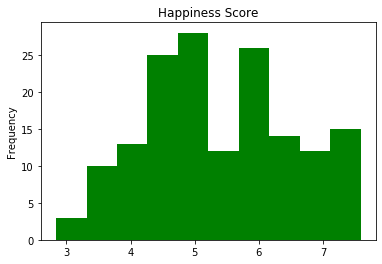

In [132]:
data['Happiness Score'].plot.hist(
    color='green',
    title='Happiness Score'
)
plt.show()

---
## 3. Summarising groups

As well as looking at overall distributions, another important aspect of data exploration is to be able to compare different subgroups of the data.

### Box plot: `boxplot()`
Let's look at the happiness distributions across different Regions.

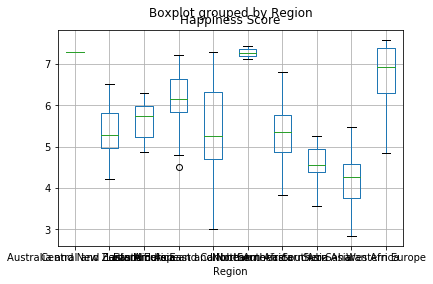

In [133]:
data.boxplot('Happiness Score', by='Region')
plt.show()

This is looking very messy initially - checking the [API](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html#pandas.DataFrame.boxplot), we see that we can easily rotate the labels:

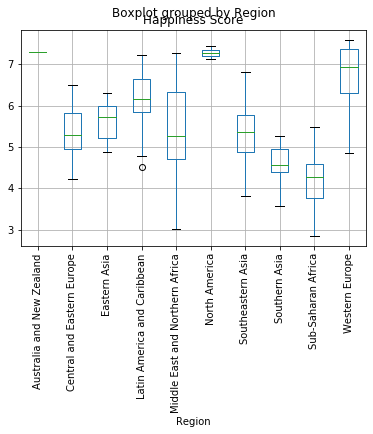

In [134]:
data.boxplot('Happiness Score', by='Region', rot=90)
plt.show()

Unfortunately, the `boxplot()` method does not pass on additional arguments to matplotlib. Any other changes to the plot appearance must be done by extracting the matplotlib *[Axes](https://matplotlib.org/stable/api/axes_api.html)* object, e.g.

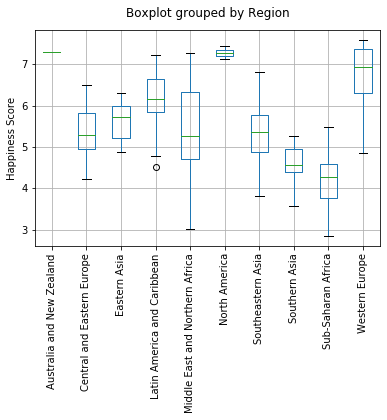

In [135]:
ax = data.boxplot('Happiness Score', by='Region', rot=90)
ax.set_title('')
ax.set_xlabel('')
ax.set_ylabel('Happiness Score')
plt.show()

### Numerical summaries: `groupby()`
Pandas provides many methods for [summary statistics](https://pandas.pydata.org/docs/reference/series.html#computations-descriptive-stats) such as the mean, median or standard deviation of a Series. 

In [103]:
data['Happiness Score'].median()

5.2325

If we want to calculate a statistic for every group, we will need to apply the `groupby()` method to the DataFrame.

In [107]:
data.groupby('Region')

In [108]:
data.groupby('Region')['Happiness Score'].median()

Region
Australia and New Zealand          7.285
Central and Eastern Europe         5.286
Eastern Asia                       5.729
Latin America and Caribbean        6.149
Middle East and Northern Africa    5.262
North America                      7.273
Southeastern Asia                  5.360
Southern Asia                      4.565
Sub-Saharan Africa                 4.272
Western Europe                     6.937
Name: Happiness Score, dtype: float64

### Exercise 2
Plot the mean happiness score for each region as a bar chart.

Bonus: add [error bars](https://pandas.pydata.org/docs/user_guide/visualization.html#plotting-with-error-bars) to show the standard error of the mean.

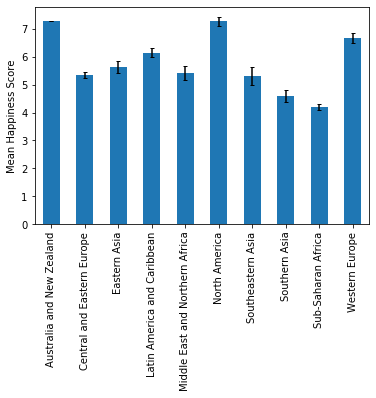

In [128]:
mean_happ = data.groupby('Region')['Happiness Score'].mean()

se_happ = data.groupby('Region')['Happiness Score'].sem()

ax = mean_happ.plot.bar(
    yerr=se_happ, 
    capsize=2 
)
ax.set_ylabel('Mean Happiness Score')
ax.set_xlabel('')
plt.show()

---
## 4. Subsetting data
Sometimes we want to work with only a subset of the rows. There are a few different ways to do this in pandas - here are some basic examples:

### Get a random sample of data: `sample()`
By default, this is random sampling without replacement.

In [136]:
data.sample(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
127,Botswana,Sub-Saharan Africa,128,4.332,0.04934,0.99355,1.10464,0.04776,0.49495,0.12474,0.10461,1.46181
70,Mauritius,Sub-Saharan Africa,71,5.477,0.07197,1.00761,0.98521,0.70950,0.56066,0.07521,0.37744,1.76145
128,Myanmar,Southeastern Asia,129,4.307,0.04351,0.27108,0.70905,0.48246,0.44017,0.19034,0.79588,1.41805
72,Estonia,Central and Eastern Europe,73,5.429,0.04013,1.15174,1.22791,0.77361,0.44888,0.15184,0.08680,1.58782
148,Chad,Sub-Saharan Africa,149,3.667,0.03830,0.34193,0.76062,0.15010,0.23501,0.05269,0.18386,1.94296
89,Philippines,Southeastern Asia,90,5.073,0.04934,0.70532,1.03516,0.58114,0.62545,0.12279,0.24991,1.75360
132,Cameroon,Sub-Saharan Africa,133,4.252,0.04678,0.42250,0.88767,0.23402,0.49309,0.05786,0.20618,1.95071
45,Japan,Eastern Asia,46,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
25,Germany,Western Europe,26,6.750,0.01848,1.32792,1.29937,0.89186,0.61477,0.21843,0.28214,2.11569
67,Algeria,Middle East and Northern Africa,68,5.605,0.05099,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209


### Get rows according to column value
If we want to get hold of rows that match certain criteria, we can do this by first constructing a boolean Series to use as an index.

In [145]:
data['Region'] == 'Western Europe'

0       True
1       True
2       True
3       True
4      False
       ...  
153    False
154    False
155    False
156    False
157    False
Name: Region, Length: 158, dtype: bool

In [146]:
data[ data['Region'] == 'Western Europe' ]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
12,Austria,Western Europe,13,7.200,0.03751,1.33723,1.29704,0.89042,0.62433,0.18676,0.33088,2.53320
16,Luxembourg,Western Europe,17,6.946,0.03499,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961
17,Ireland,Western Europe,18,6.940,0.03676,1.33596,1.36948,0.89533,0.61777,0.28703,0.45901,1.97570


### Get rows that match multiple criteria
If necessary, you can combine boolean Series using the logical operators `&` (AND) and `|` (OR).

In [157]:
data[ (data['Region'] == 'Eastern Asia') 
      & 
      (data['Happiness Score'] > 5)
]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
37,Taiwan,Eastern Asia,38,6.298,0.03868,1.29098,1.07617,0.87530,0.39740,0.08129,0.25376,2.32323
45,Japan,Eastern Asia,46,5.987,0.03581,1.27074,1.25712,0.99111,0.49615,0.18060,0.10705,1.68435
46,South Korea,Eastern Asia,47,5.984,0.04098,1.24461,0.95774,0.96538,0.33208,0.07857,0.18557,2.21978
71,Hong Kong,Eastern Asia,72,5.474,0.05051,1.38604,1.05818,1.01328,0.59608,0.37124,0.39478,0.65429
83,China,Eastern Asia,84,5.140,0.02424,0.89012,0.94675,0.81658,0.51697,0.02781,0.08185,1.86040


In [158]:
data[ (data['Region'] == 'Eastern Asia') 
      | 
      (data['Happiness Score'] > 5)
]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
89,Philippines,Southeastern Asia,90,5.073,0.04934,0.70532,1.03516,0.58114,0.62545,0.12279,0.24991,1.75360
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032
91,Morocco,Middle East and Northern Africa,92,5.013,0.03420,0.73479,0.64095,0.60954,0.41691,0.08546,0.07172,2.45373
92,Macedonia,Central and Eastern Europe,93,5.007,0.05376,0.91851,1.00232,0.73545,0.33457,0.05327,0.22359,1.73933


### Exercise 3
Make a scatter plot of Happiness Score vs Generosity for a region of your choice.

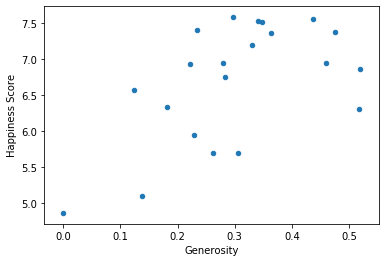

In [166]:
data[ data['Region'] == 'Western Europe' ].plot.scatter(
    'Generosity',
    'Happiness Score'
)